Nama : Ananda Sheva Hidayat <br>
NPM : 2217051096 <br>
Kelas : B

# **UTP Responsi AI**

# Import Library

In [157]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

#Dataset

Tujuan dari membuat model dari dataset ini mungkin bisa beragam, salah satunya adalah untuk memprediksi atau mengklasifikasikan usia dan jenis kelamin untuk setiap tujuan yang ingin dituju berdasarkan fitur-fitur yang ada dalam dataset seperti tahun menikah, mempunyai anak, menganut religi, mengenyam pendidikan, pekerjaan.

In [158]:
df = pd.read_csv("https://raw.githubusercontent.com/AnandaSheva/AI-Datasets/main/Affairs.csv")
df

,Unnamed: 0,affairs,gender,age,yearsmarried,children,religiousness,education,occupation,rating
0,4,0,male,37.0,10.00,no,3,18,7,4
1,5,0,female,27.0,4.00,no,4,14,6,4
2,11,0,female,32.0,15.00,yes,1,12,1,4
3,16,0,male,57.0,15.00,yes,5,18,6,5
4,23,0,male,22.0,0.75,no,2,17,6,3
...,...,...,...,...,...,...,...,...,...,...
596,1938,1,male,22.0,1.50,yes,1,12,2,5
597,1941,7,female,32.0,10.00,yes,2,18,5,4
598,1954,2,male,32.0,10.00,yes,2,17,6,5
599,1959,2,male,22.0,7.00,yes,3,18,6,2


In [159]:
df.head()

,Unnamed: 0,affairs,gender,age,yearsmarried,children,religiousness,education,occupation,rating
0,4,0,male,37.0,10.00,no,3,18,7,4
1,5,0,female,27.0,4.00,no,4,14,6,4
2,11,0,female,32.0,15.00,yes,1,12,1,4
3,16,0,male,57.0,15.00,yes,5,18,6,5
4,23,0,male,22.0,0.75,no,2,17,6,3


In [160]:
#informasi dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     601 non-null    int64  
 1   affairs        601 non-null    int64  
 2   gender         601 non-null    object 
 3   age            601 non-null    float64
 4   yearsmarried   601 non-null    float64
 5   children       601 non-null    object 
 6   religiousness  601 non-null    int64  
 7   education      601 non-null    int64  
 8   occupation     601 non-null    int64  
 9   rating         601 non-null    int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 47.1+ KB


In [161]:
#menghitung jumlah kolom dan baris
df.shape

(601, 10)

# EDA & Preprocessing

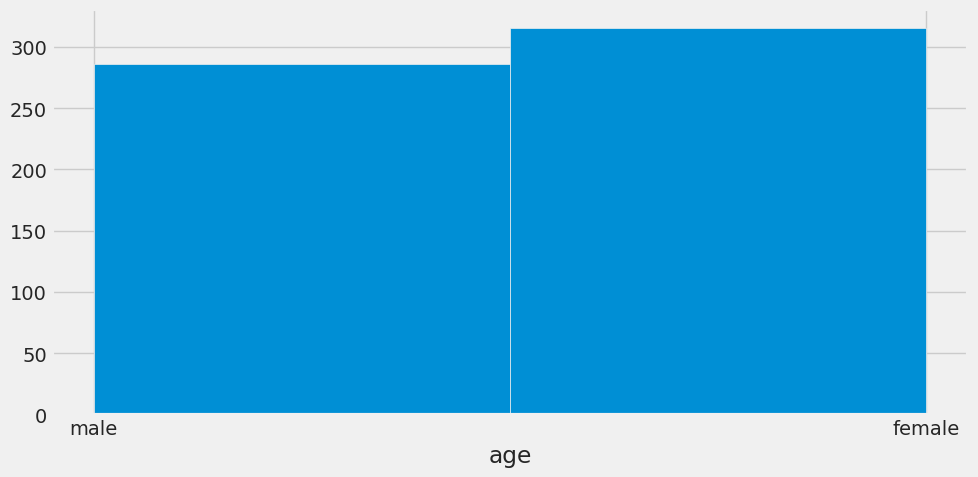

<Figure size 640x480 with 0 Axes>

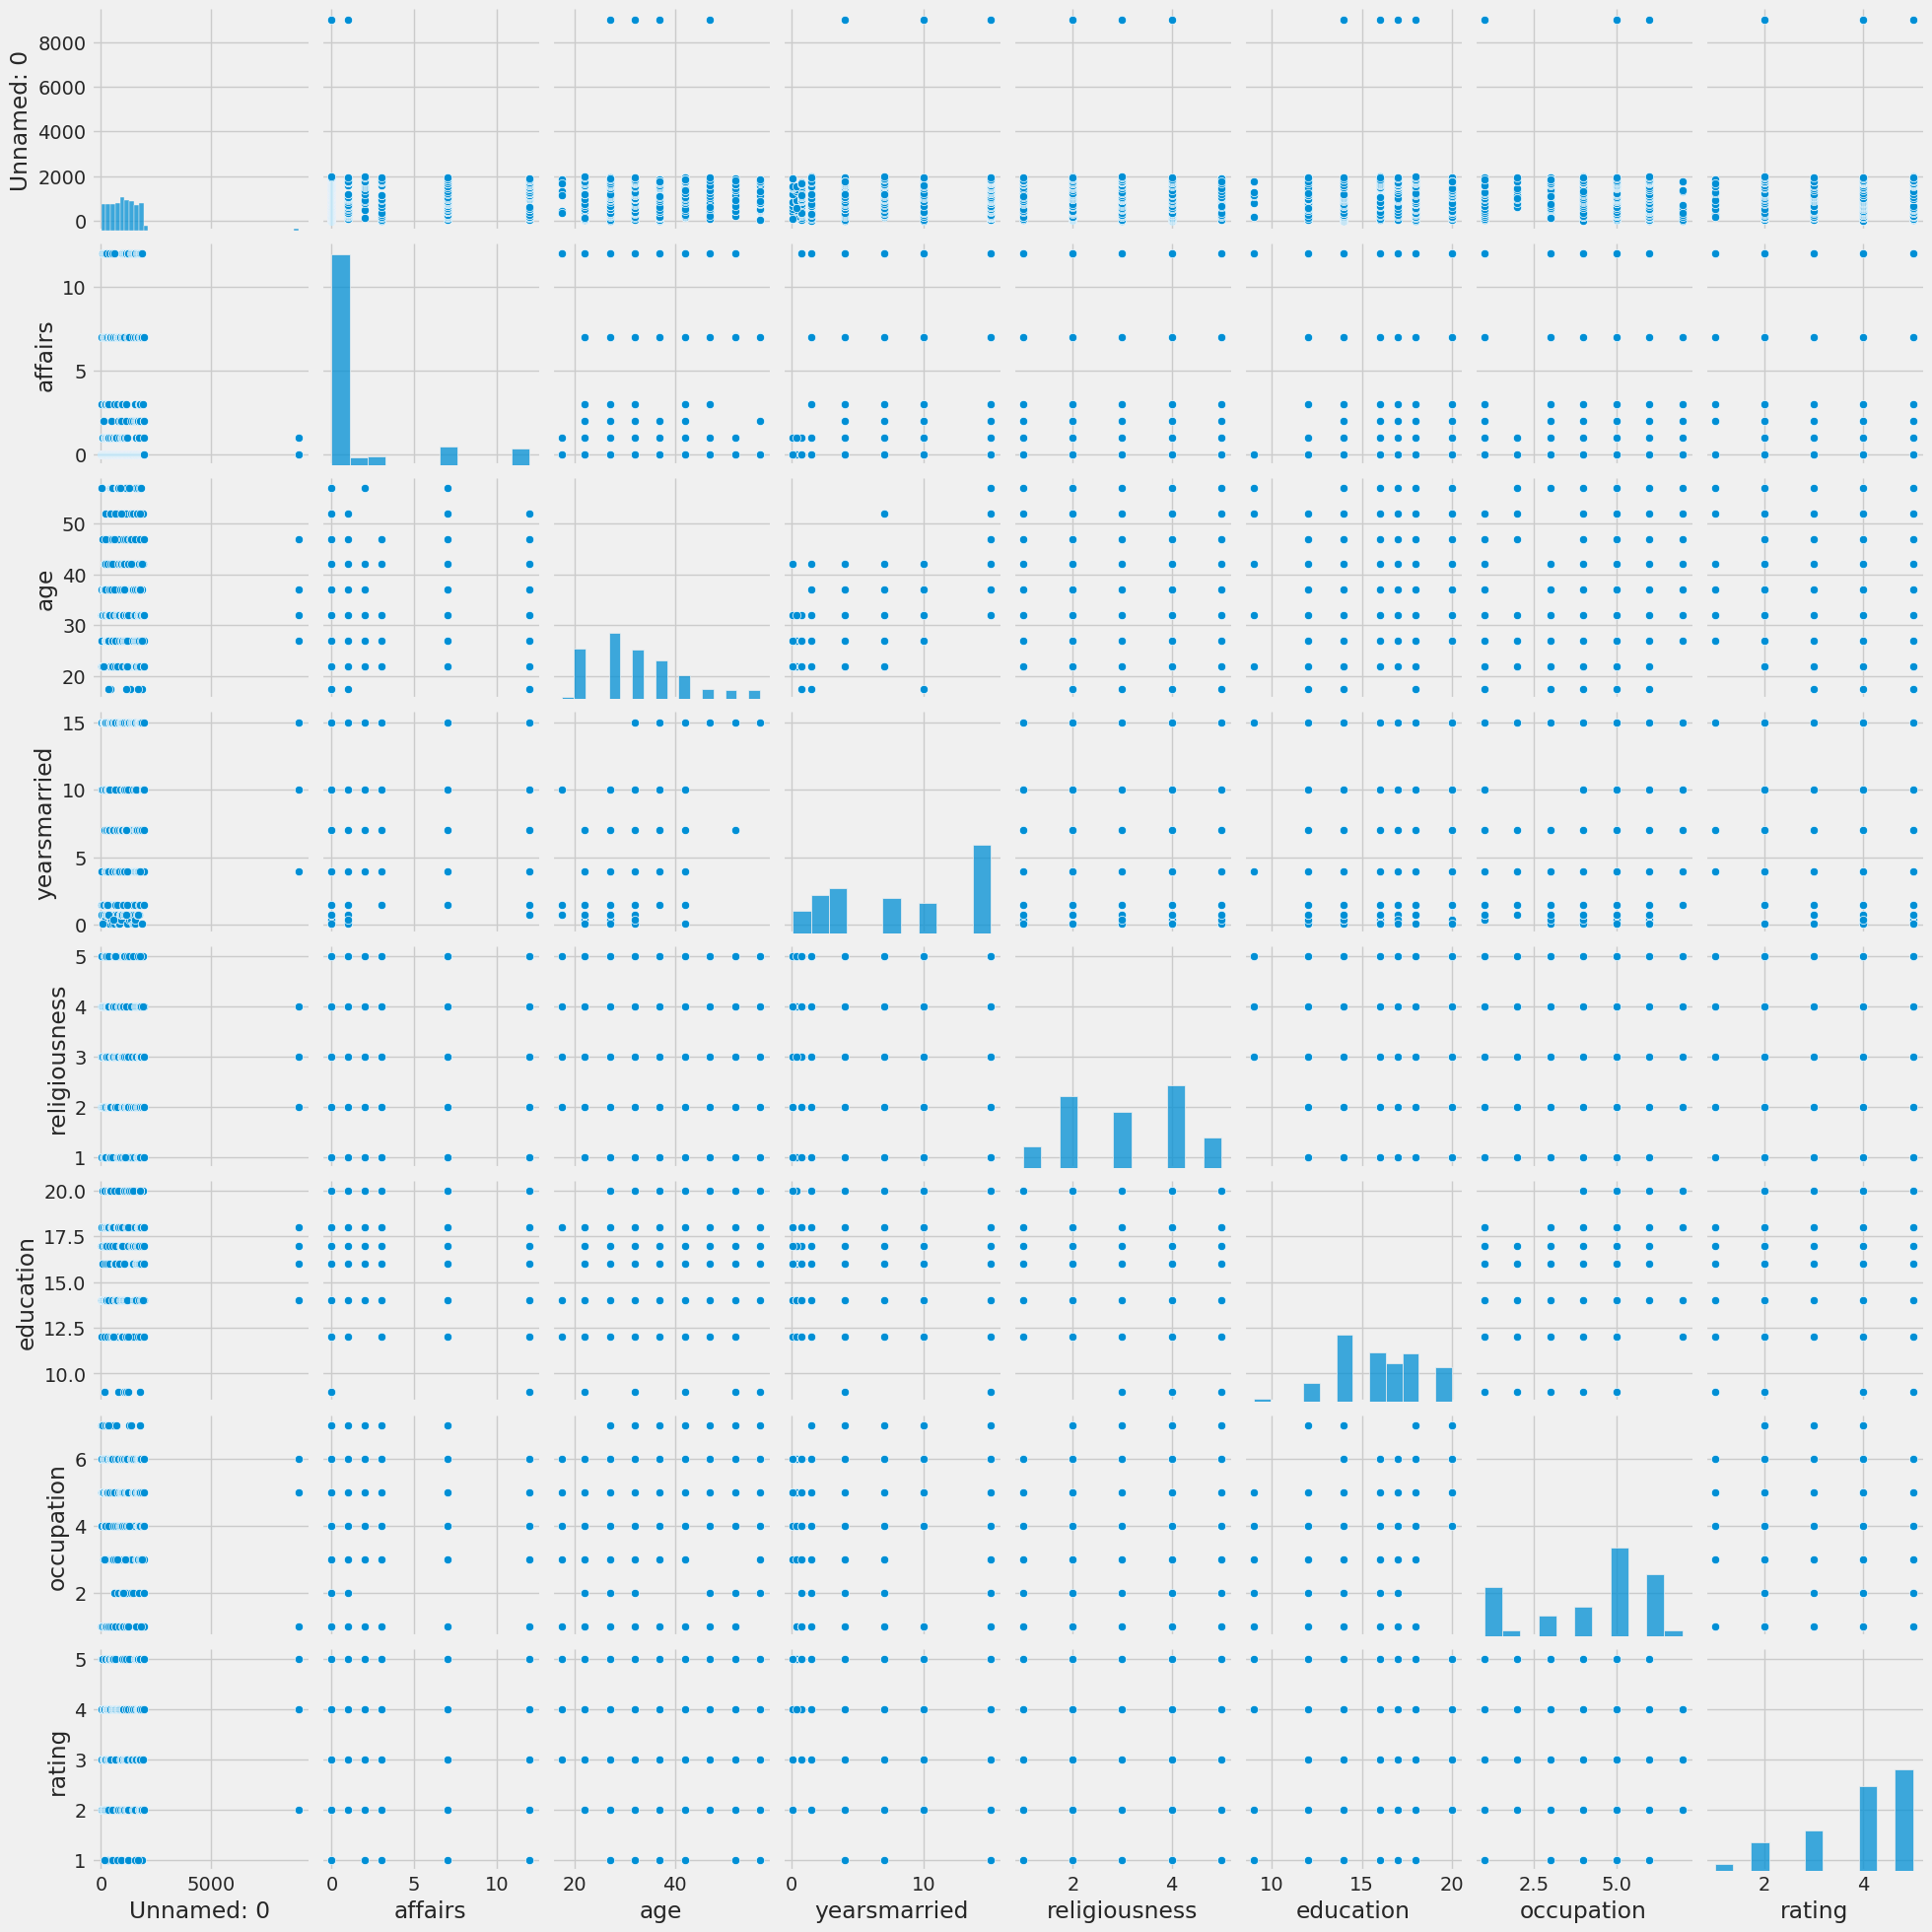

In [162]:
# Seting: matplotlib and seaborn
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')

# Data eksplorasi dengan visualisasi
plt.figure(figsize=(10, 5))
plt.hist(df["gender"], bins = df.gender.nunique())
plt.xlabel("age")
plt.tight_layout()
plt.show()

plt.figure()
sns.pairplot(df)
plt.show()

In [164]:
# menghitung dataframe yang terduplikasi
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
596    False
597    False
598    False
599    False
600    False
Length: 601, dtype: bool

In [165]:
# melihat statistik data
df.describe()

,Unnamed: 0,affairs,age,yearsmarried,religiousness,education,occupation,rating
count,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000
mean,1059.722130,1.455907,32.487521,8.177696,3.116473,16.166389,4.194676,3.931780
std,914.904611,3.298758,9.288762,5.571303,1.167509,2.402555,1.819443,1.103179
min,4.000000,0.000000,17.500000,0.125000,1.000000,9.000000,1.000000,1.000000
25%,528.000000,0.000000,27.000000,4.000000,2.000000,14.000000,3.000000,3.000000
50%,1009.000000,0.000000,32.000000,7.000000,3.000000,16.000000,5.000000,4.000000
75%,1453.000000,0.000000,37.000000,15.000000,4.000000,18.000000,6.000000,5.000000
max,9029.000000,12.000000,57.000000,15.000000,5.000000,20.000000,7.000000,5.000000


In [166]:
#mengecek data yang hilang
df.isnull().sum()

Unnamed: 0       0
affairs          0
gender           0
age              0
yearsmarried     0
children         0
religiousness    0
education        0
occupation       0
rating           0
dtype: int64

In [167]:
#menghitung total data
total_data = len(df)
total_data

601

In [168]:
#drop nilai string pada kolom
df = df.drop(['gender','children'], axis=1)

# hapus NaN Values
df = df.dropna()
df

,Unnamed: 0,affairs,age,yearsmarried,religiousness,education,occupation,rating
0,4,0,37.0,10.00,3,18,7,4
1,5,0,27.0,4.00,4,14,6,4
2,11,0,32.0,15.00,1,12,1,4
3,16,0,57.0,15.00,5,18,6,5
4,23,0,22.0,0.75,2,17,6,3
...,...,...,...,...,...,...,...,...
596,1938,1,22.0,1.50,1,12,2,5
597,1941,7,32.0,10.00,2,18,5,4
598,1954,2,32.0,10.00,2,17,6,5
599,1959,2,22.0,7.00,3,18,6,2


In [169]:
X = df.drop(columns = 'affairs',)
y = df['affairs']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

X_train.columns

Index(['Unnamed: 0', 'age', 'yearsmarried', 'religiousness', 'education',
       'occupation', 'rating'],
      dtype='object')

In [170]:
# Me rescale data dari setiap kolom
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Modelling & Evaluation

In [198]:
# Membuat dan melatih model Logistic Regression dengan maks iterasi tergantung isi dari dataset
logreg = LogisticRegression(C=1.0, max_iter=200)

#train model
logreg = logreg.fit(X_train, y_train)

#predict model
y_pred = logreg.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [199]:
print(f"Test Accuracy :", logreg.score(X_test, y_test))

Test Accuracy : 0.7593360995850622


# Dummy Test

In [186]:
# Data Dummy baru
data = pd.DataFrame(
  {
    "age": [34, 24, 22, 21, 28],
    "yearsmarried": [18, 12, 11, 10, 14],
    "religiousness": [3, 2, 7, 5, 9],
    "education": [41, 20, 12, 23, 39],
    "occupation": [10, 3, 12, 1, 5]
}

)
data

,age,yearsmarried,religiousness,education,occupation
0,34,18,3,41,10
1,24,12,2,20,3
2,22,11,7,12,12
3,21,10,5,23,1
4,28,14,9,39,5


In [187]:
# Memisahkan features dan target dari dataset
features = ["age", "yearsmarried", "religiousness", "education", "occupation"]
X = df[features]
y = df['affairs']

logreg = LogisticRegression()
logreg = logreg.fit(X, y)

print(logreg.predict(data))

[0 0 0 0 0]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Kesimpulan :** <br>
dengan menambahkan data dummy yang hanya berisi 5 (lima) dataset dengan tidak adanya keanekaragaman data tanpa dilakukan preprocessing hanya mampu memiliki peforma namun memiliki akurasi yang mencapai 0.75. Hal ini dapat disimpulkan bahwa setiap gender direntan usia tertentu bisa memprediksi semua fitur didalam dataset